In [198]:
!pip install -U kaleido


In [199]:
!pip install plotly kaleido

In [200]:
!pip install -U kaleido

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from scipy import stats
import seaborn as sns
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [202]:
data = pd.read_csv("coffee_ratings.csv")
data.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


**Data Cleaning**

In [203]:
print(data.shape)
print(data.columns)


(1339, 43)
Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


Notes:

* Expiration date is 364 days after grading date.

* Used value_counts to check anomaly

* in country partner is the same as cerification body




In [204]:
# dropping irrelevant columns
data = data.drop(columns=['owner','farm_name', 'lot_number', 'company', 'altitude','mill','ico_number','producer', 'region',
                   'grading_date', 'owner_1', 'unit_of_measurement','in_country_partner','moisture',
                   'certification_address', 'certification_contact','altitude_low_meters', 'variety', 'expiration',
                   'altitude_high_meters'])

In [205]:
# dropping observations with very very poor grade
data = data[data.quakers <= 5]
data = data[data.category_one_defects <= 5]
data = data[data.category_one_defects <= 10]
data

,total_cup_points,species,country_of_origin,number_of_bags,bag_weight,harvest_year,processing_method,aroma,flavor,aftertaste,...,uniformity,clean_cup,sweetness,cupper_points,category_one_defects,quakers,color,category_two_defects,certification_body,altitude_mean_meters
0,90.58,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.67,8.83,8.67,...,10.00,10.00,10.00,8.75,0,0.0,Green,0,METAD Agricultural Development plc,2075.0
1,89.92,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.75,8.67,8.50,...,10.00,10.00,10.00,8.58,0,0.0,Green,1,METAD Agricultural Development plc,2075.0
2,89.75,Arabica,Guatemala,5,1,NaN,NaN,8.42,8.50,8.42,...,10.00,10.00,10.00,9.25,0,0.0,NaN,0,Specialty Coffee Association,1700.0
3,89.00,Arabica,Ethiopia,320,60 kg,2014,Natural / Dry,8.17,8.58,8.42,...,10.00,10.00,10.00,8.67,0,0.0,Green,2,METAD Agricultural Development plc,2000.0
4,88.83,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.25,8.50,8.25,...,10.00,10.00,10.00,8.58,0,0.0,Green,2,METAD Agricultural Development plc,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,80.17,Robusta,India,250,2 kg,2013,Natural / Dry,7.58,7.42,7.42,...,10.00,10.00,7.42,7.58,0,0.0,Green,0,Specialty Coffee Association,750.0
1333,79.33,Robusta,United States,100,1 kg,2012,Natural / Dry,7.92,7.50,7.42,...,9.33,10.00,7.58,7.33,0,0.0,Green,0,Specialty Coffee Association,3000.0
1334,78.75,Robusta,Ecuador,1,2 kg,2016,NaN,7.75,7.58,7.33,...,10.00,10.00,7.75,7.83,0,0.0,Blue-Green,1,Specialty Coffee Association,NaN
1335,78.08,Robusta,Ecuador,1,2 kg,2016,NaN,7.50,7.67,7.75,...,10.00,10.00,8.42,8.58,0,0.0,Blue-Green,0,Specialty Coffee Association,40.0


In [206]:
# dropping observations with missing values
data = data.dropna()
data

,total_cup_points,species,country_of_origin,number_of_bags,bag_weight,harvest_year,processing_method,aroma,flavor,aftertaste,...,uniformity,clean_cup,sweetness,cupper_points,category_one_defects,quakers,color,category_two_defects,certification_body,altitude_mean_meters
0,90.58,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.67,8.83,8.67,...,10.00,10.0,10.00,8.75,0,0.0,Green,0,METAD Agricultural Development plc,2075.0
1,89.92,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.75,8.67,8.50,...,10.00,10.0,10.00,8.58,0,0.0,Green,1,METAD Agricultural Development plc,2075.0
3,89.00,Arabica,Ethiopia,320,60 kg,2014,Natural / Dry,8.17,8.58,8.42,...,10.00,10.0,10.00,8.67,0,0.0,Green,2,METAD Agricultural Development plc,2000.0
4,88.83,Arabica,Ethiopia,300,60 kg,2014,Washed / Wet,8.25,8.50,8.25,...,10.00,10.0,10.00,8.58,0,0.0,Green,2,METAD Agricultural Development plc,2075.0
9,88.25,Arabica,Ethiopia,50,60 kg,2014,Natural / Dry,8.08,8.58,8.50,...,10.00,10.0,10.00,8.50,0,0.0,Green,4,METAD Agricultural Development plc,1822.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,82.50,Robusta,India,320,60 kg,2015,Washed / Wet,7.67,7.75,7.58,...,10.00,10.0,7.92,7.92,0,0.0,Green,0,Specialty Coffee Association,1000.0
1322,81.58,Robusta,India,320,60 kg,2015,Natural / Dry,7.67,7.83,7.75,...,10.00,10.0,7.75,7.75,0,0.0,Green,0,Specialty Coffee Association,1000.0
1327,81.25,Robusta,India,140,2 kg,2013,Natural / Dry,7.50,7.50,7.25,...,10.00,10.0,7.83,7.83,0,0.0,Blue-Green,0,Specialty Coffee Association,750.0
1332,80.17,Robusta,India,250,2 kg,2013,Natural / Dry,7.58,7.42,7.42,...,10.00,10.0,7.42,7.58,0,0.0,Green,0,Specialty Coffee Association,750.0


In [207]:
#correcting naming anomalies in country partners
data.loc[:,"certification_body"] = data.certification_body.str.replace('Specialty Coffee Ass', 'Specialty Coffee Association')
data.loc[:,"certification_body"] = data.certification_body.str.replace('Blossom Valley International\n', 'Blossom Valley International')
data.loc[:,"certification_body"] = data.certification_body.str.replace('Specialty Coffee Associationociation', 'Specialty Coffee Association')
data.loc[:,"certification_body"] = data.certification_body.str.replace('Asociación Mexicana De Cafés y Cafeterías De Especialidad A.C.','Cafeterías De Especialidad AC')


In [209]:
# renaming some countries
data = data.replace('Tanzania, United Republic Of', 'Tanzania')
data = data.replace('United States (Puerto Rico)', 'Puerto Rico' )

Standarding the names of various processing methods

In [210]:
data.loc[:,'processing_method'] = data.processing_method.str.replace('/','|')
data.loc[:,'processing_method'] = data.processing_method.str.replace(' ','')

In [211]:
data.loc[:,'processing_method'] = data.processing_method.str.replace('Washed|Wet','Washed')
data.loc[:,'processing_method'] = data.processing_method.str.replace('Natural|Dry','Dried')
data.loc[:,'processing_method'] = data.processing_method.str.replace('Semi-washed|Semi-pulped','Semi-washed')
data.loc[:,'processing_method'] = data.processing_method.str.replace('Pulpednatural|honey','Pulped natural')

In [212]:
data.to_csv('clean_coffe_data.csv')

**E D A**

In [213]:
# data summary
data.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,category_one_defects,quakers,category_two_defects,altitude_mean_meters
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,82.198731,164.167243,7.574025,7.520358,7.394152,7.534764,7.503795,7.505329,9.881396,9.879193,9.926574,7.478512,0.185698,0.124567,3.382930,1894.831849
std,2.497450,126.134943,0.296197,0.311094,0.318046,0.298898,0.264327,0.326596,0.423102,0.652105,0.442995,0.387361,0.661637,0.558936,4.860985,9798.372899
min,59.830000,1.000000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,1.330000,1.330000,5.170000,0.000000,0.000000,0.000000,1.000000
25%,81.250000,20.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.000000,0.000000,0.000000,1100.000000
50%,82.500000,250.000000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.000000,0.000000,2.000000,1310.640000
75%,83.580000,275.000000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,0.000000,0.000000,4.000000,1600.000000
max,90.580000,600.000000,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,10.000000,10.000000,8.750000,5.000000,5.000000,45.000000,190164.000000


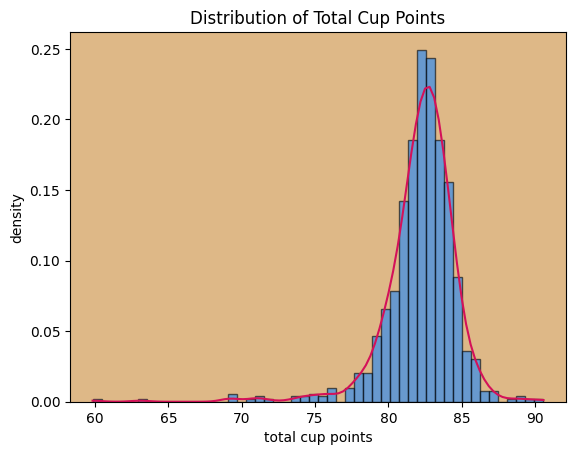

In [214]:
fig , ax = plt.subplots()
# Plot the histogram
ax.hist(data['total_cup_points'], bins=50, density=True, alpha=0.6, color='#1A85FF', edgecolor='black')

# Plot the KDE
kde = gaussian_kde(data['total_cup_points'])
x_range = np.linspace(data['total_cup_points'].min(), data['total_cup_points'].max(), 100)
ax.plot(x_range, kde(x_range), color='#D41159')

# Add title
ax.set_title('Distribution of Total Cup Points')
ax.set_xlabel('total cup points')
ax.set_ylabel('density')
ax.set_facecolor("burlywood")
fig.savefig('point_distribution.png')
fig.show()

In [215]:
# hist = go.Histogram(
#     x=data['total_cup_points'],
#     nbinsx=50,
#     histnorm='density',
#     marker_color='blue',
#     opacity=0.6,
#     name='Histogram'
# )

# fig = go.Figure(data=[hist])

# fig.update_layout(
#     title='Distribution of Total Cup Points',
#     xaxis_title='Total Cup Points',
#     yaxis_title='Density',
#     bargap=0.2
# )
# pio.write_image(fig, 'distribution_of_total_cup_points.png')
# # Show the plot
# fig.show()

**Exploring Correlations**

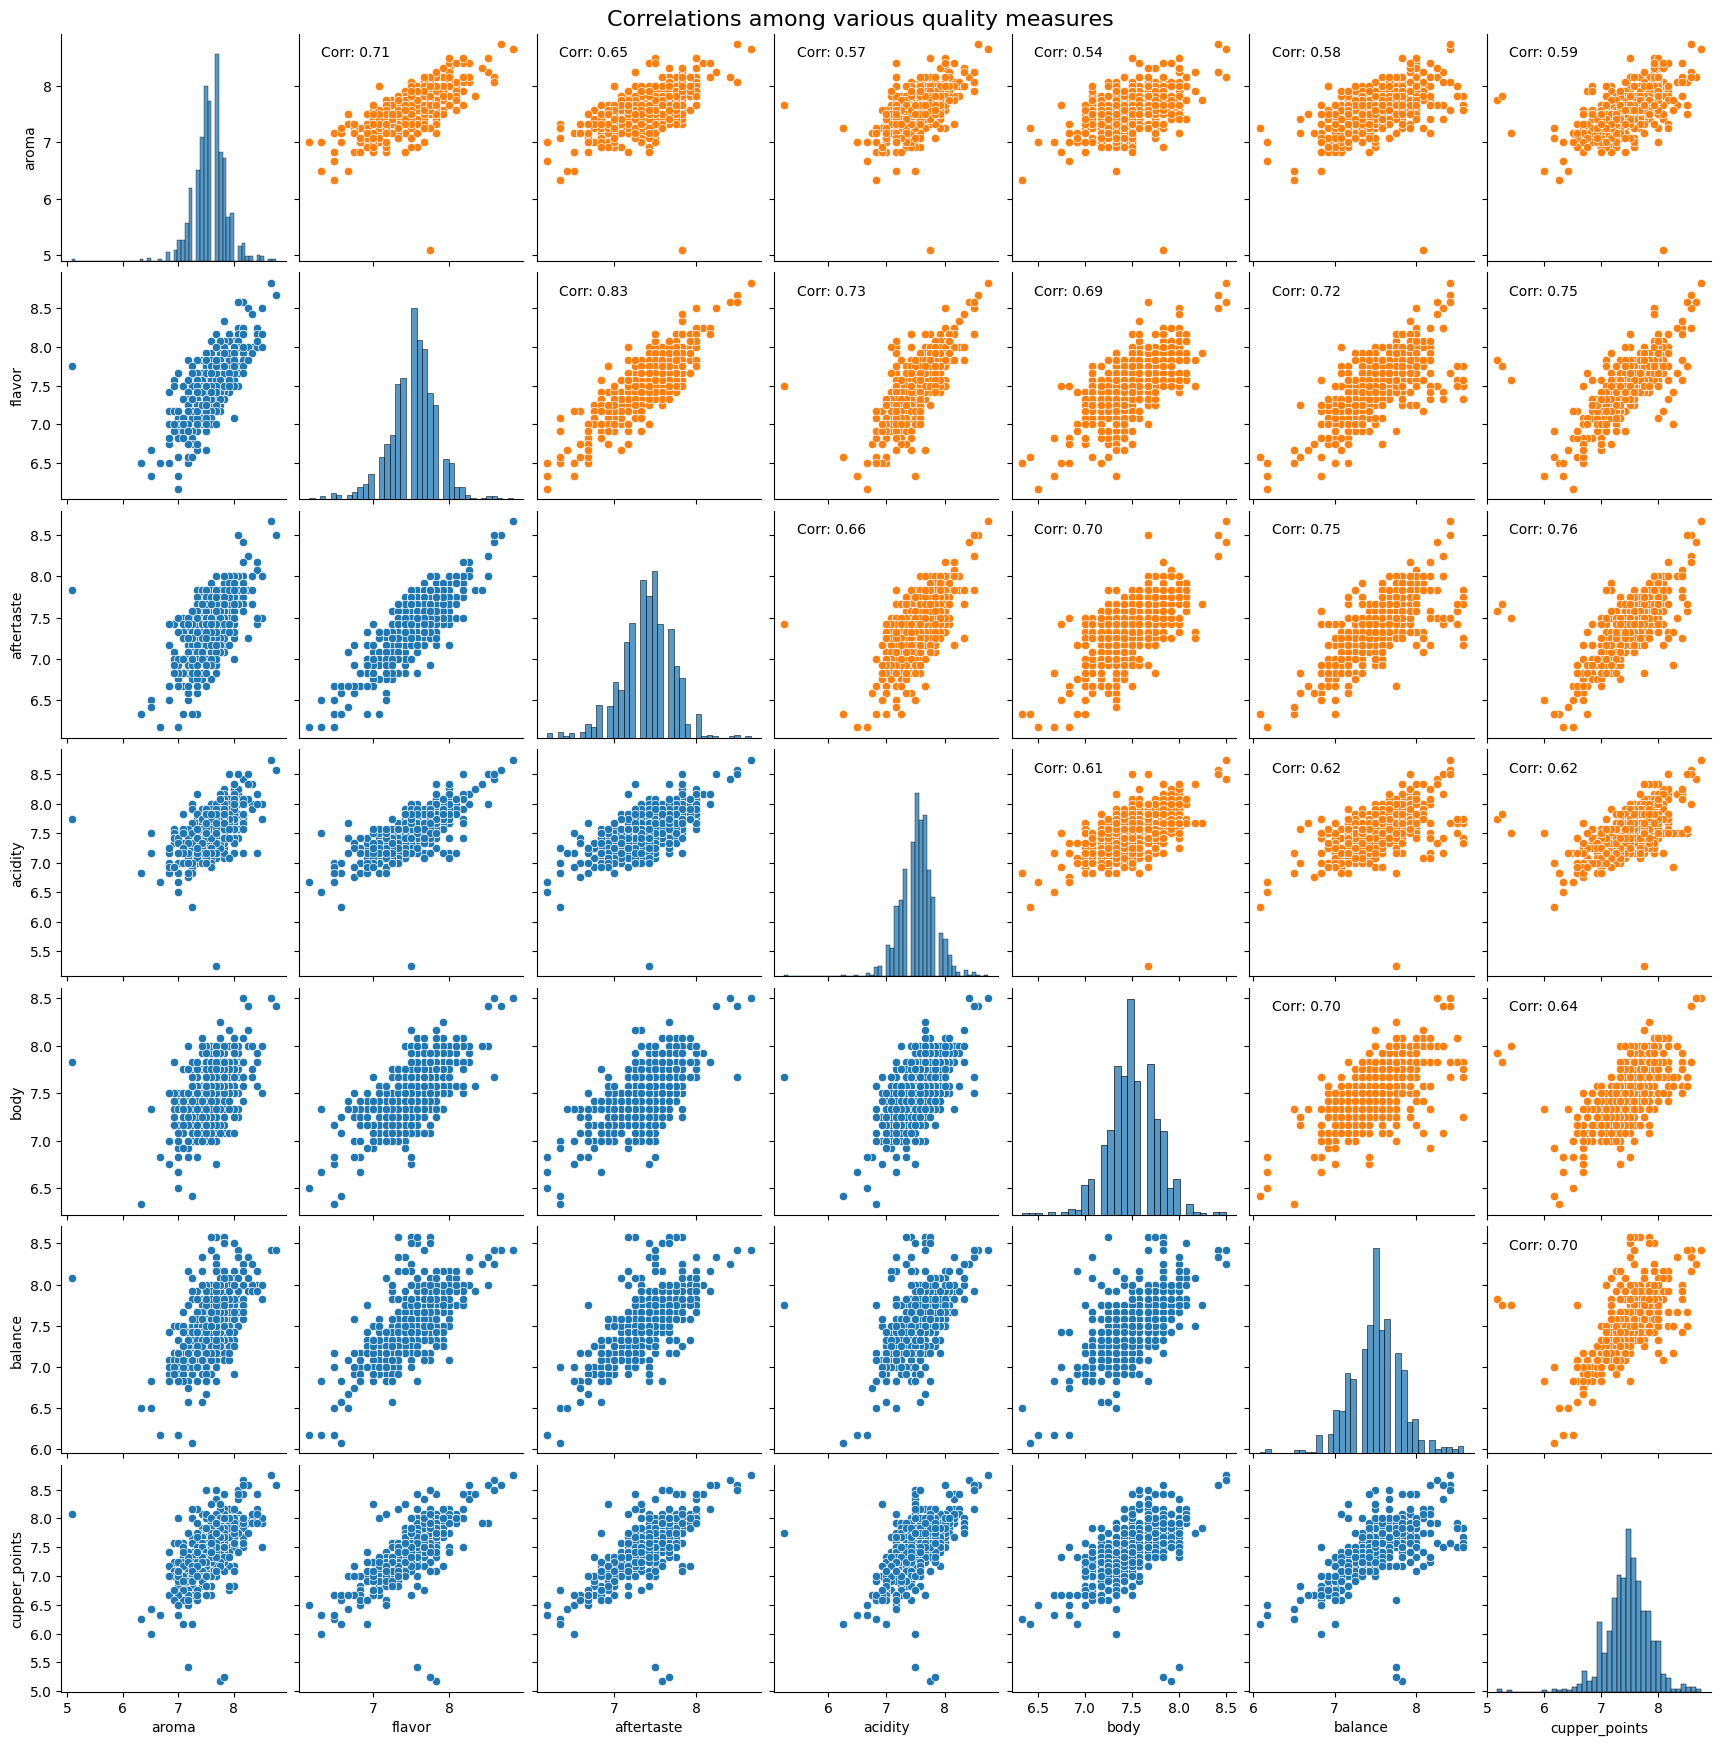

In [216]:
def corrfunc(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'Corr: {r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes)

# uniformity, clean_cup and sweetness show discreteness and hence not included
fig = sns.pairplot(data[['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance','cupper_points']])
fig.map_upper(corrfunc)
fig.map_upper(sns.scatterplot)

plt.suptitle('Correlations among various quality measures', y=1, fontsize=16)
plt.show()




In [217]:
data.total_cup_points.quantile(.8)

83.83

In [218]:
# correlation among numeric features
dataframe_corr = data.drop(columns=['total_cup_points','category_one_defects','quakers','number_of_bags',
                             'category_two_defects','altitude_mean_meters']).select_dtypes(['number']).corr()
dataframe_corr = round(dataframe_corr,2)
dataframe_corr

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points
aroma,1.00,0.71,0.65,0.57,0.54,0.58,0.14,0.18,0.06,0.59
flavor,0.71,1.00,0.83,0.73,0.69,0.72,0.23,0.30,0.16,0.75
aftertaste,0.65,0.83,1.00,0.66,0.70,0.75,0.25,0.29,0.16,0.76
acidity,0.57,0.73,0.66,1.00,0.61,0.62,0.20,0.17,0.07,0.62
body,0.54,0.69,0.70,0.61,1.00,0.70,0.14,0.16,0.08,0.64
balance,0.58,0.72,0.75,0.62,0.70,1.00,0.25,0.25,0.14,0.70
uniformity,0.14,0.23,0.25,0.20,0.14,0.25,1.00,0.43,0.37,0.21
clean_cup,0.18,0.30,0.29,0.17,0.16,0.25,0.43,1.00,0.45,0.27
sweetness,0.06,0.16,0.16,0.07,0.08,0.14,0.37,0.45,1.00,0.13
cupper_points,0.59,0.75,0.76,0.62,0.64,0.70,0.21,0.27,0.13,1.00


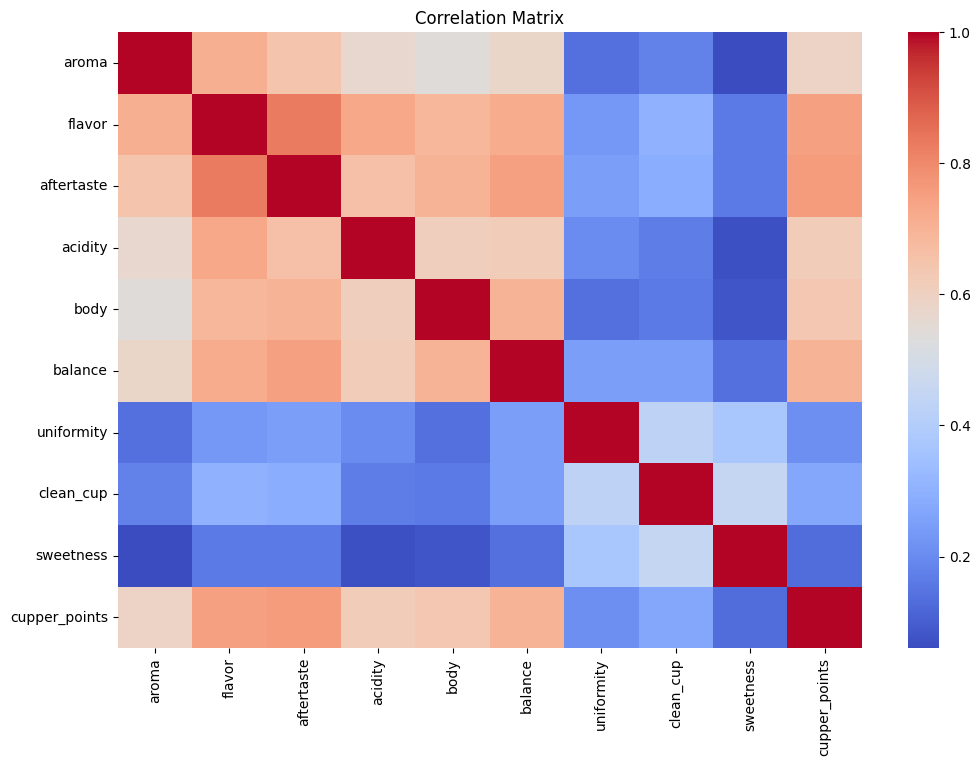

In [219]:
# Visualize the correlation matrix
fig = plt.figure(figsize=(12, 8))
sns.heatmap(dataframe_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
fig.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

Observations from correlations:

* insignificant correlation between mean_altitude and any of the other variables
*  insignificant correlation between number_of_bags and any of the other variables
* very strong positive correlations:
    * total_cup_points and flavor
    * total_cup_points and aftertaste
* strong positive correlations:
  * total_cup_points and aroma
  * total_cup_points and acidity
  * total_cup_points and body
  * total_cup_points and balance
  * total_cup_points and clean_cup
  * total_cup_points and cupper_points
* medium postive correlations:
  * total_cup_points and sweetness
  * total_cup_points and uniformity
* very weak correlations
  * total_cup_points and moisture (-)
  * total_cup_points and category_one_defects (-)
  * total_cup_points and quakers (+)
* weak correlations
  * total_cup_points and category_two_defects (-)

In [220]:
#correlation between total_cup_points and aftertaste and flavor
total_cup_points = data.total_cup_points
aftertaste = data.aftertaste
flavor = data.flavor
processing = data.processing_method

slope0, intercept0 = np.polyfit(total_cup_points, aftertaste, 1)
slope1, intercept1 = np.polyfit(total_cup_points, flavor, 1)
slope2, intercept2 = np.polyfit(flavor, aftertaste, 1)

x = total_cup_points
y0 = slope0*np.array(x) + intercept0
y1 = slope1*np.array(x) + intercept1
y2 = slope2*np.array(flavor) + intercept2

corr_aftertaste = total_cup_points.corr(aftertaste)
corr_flavor = total_cup_points.corr(flavor)
flavor_aftertaste = flavor.corr(aftertaste)

In [221]:
# colors6 = ['#FEFE62', '#994F00', '#009988', '#EE7733', '#CC3311', '#EE3377']

# processing_methods = list(processing.value_counts().index)

# color_maps = {}

# #Create an dictionary to map each color to each major category.

# for i in range(len(processing_methods)):
#   color_maps[processing_methods[i]] = colors6[i]
#   print(processing_methods[i] + " will use color " + colors6[i])

# #Now make a new df column...
# data['color'] = data['processing_method'].map(color_maps)
# data.head()

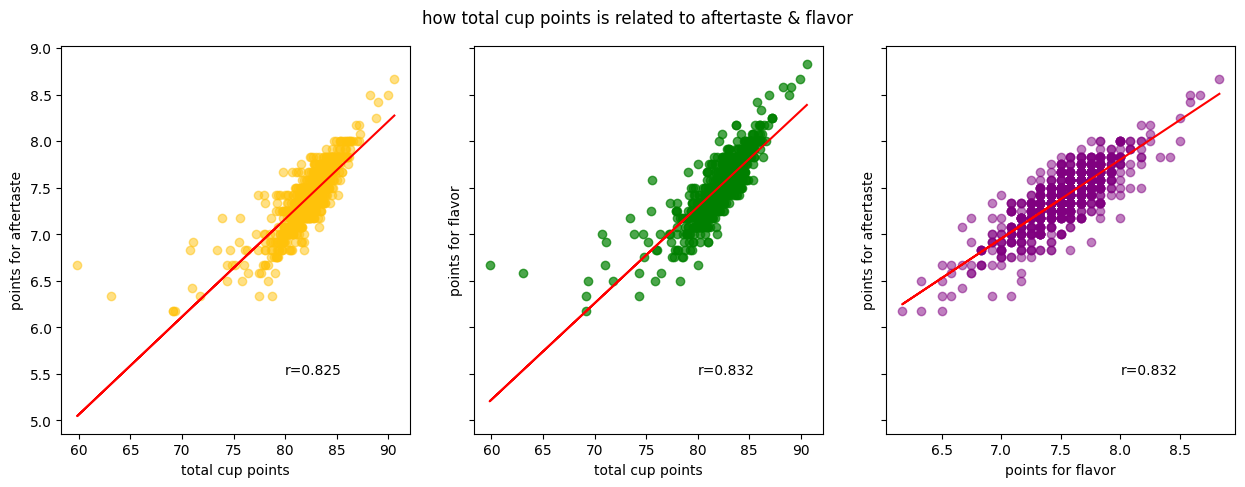

In [222]:
fig, axs = plt.subplots(1,3, tight_layout=True,  sharey=True, figsize=(13,5))
fig.tight_layout(pad=3)
axs[0].scatter(total_cup_points, aftertaste, alpha=0.5,c='#FFC20A')
axs[0].plot(x, y0, color='red', label='line of best fit')
axs[0].text(80, 5.5, f"r={round(corr_aftertaste,3)}")
axs[0].set_ylabel("points for aftertaste")
axs[0].set_xlabel("total cup points")

axs[1].scatter(data.total_cup_points, data.flavor,alpha=0.7,c='g')
axs[1].plot(x, y1, color='red', label='line of best fit')
axs[1].text(80, 5.5, f"r={round(corr_flavor,3)}")
axs[1].set_ylabel("points for flavor")
axs[1].set_xlabel("total cup points")

axs[2].scatter(flavor, aftertaste, alpha=0.5,c='purple')
axs[2].plot(flavor, y2, color='red', label='line of best fit')
axs[2].text(8, 5.5, f"r={round(flavor_aftertaste,3)}")
axs[2].set_ylabel("points for aftertaste")
axs[2].set_xlabel("points for flavor")

fig.suptitle("how total cup points is related to aftertaste & flavor")
fig.savefig('correlations_flavor_aftertaste')

fig.show()

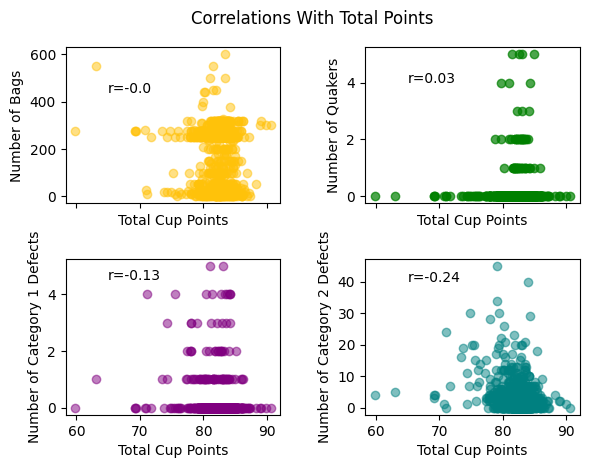

In [223]:
fig, axs = plt.subplots(2,2, tight_layout=True,  sharex=True)
fig.tight_layout(pad=3)
axs[0][0].scatter(total_cup_points, data.number_of_bags, alpha=0.5,c='#FFC20A')
axs[0][0].text(65, 440, f"r={round(data.total_cup_points.corr(data.number_of_bags),2)}")
axs[0][0].set_ylabel("Number of Bags")
axs[0][0].set_xlabel("Total Cup Points")

axs[0][1].scatter(data.total_cup_points, data.quakers,alpha=0.7,c='g')
# axs[0][1].plot(x, y1, color='red', label='line of best fit')
axs[0][1].text(65, 4, f"r={round(data.total_cup_points.corr(data.quakers),2)}")
axs[0][1].set_ylabel("Number of Quakers")
axs[0][1].set_xlabel("Total Cup Points")

axs[1][0].scatter(data.total_cup_points, data.category_one_defects, alpha=0.5,c='purple')
# axs[1][0].plot(flavor, y2, color='red', label='line of best fit')
axs[1][0].text(65, 4.5, f"r={round(data.total_cup_points.corr(data.category_one_defects),2)}")
axs[1][0].set_ylabel("Number of Category 1 Defects")
axs[1][0].set_xlabel("Total Cup Points")

axs[1][1].scatter(data.total_cup_points, data.category_two_defects, alpha=0.5,c='teal')
# axs[1][1].plot(flavor, y2, color='red', label='line of best fit')
axs[1][1].text(65, 40, f"r={round(data.total_cup_points.corr(data.category_two_defects),2)}")
axs[1][1].set_ylabel("Number of Category 2 Defects")
axs[1][1].set_xlabel("Total Cup Points")

fig.suptitle("Correlations With Total Points")
fig.savefig('correlations with total points')

fig.show()

In [224]:
slope0, intercept0 = np.polyfit(total_cup_points, flavor, 1)
slope1, intercept1 = np.polyfit(total_cup_points, aftertaste, 1)
slope2, intercept2 = np.polyfit(total_cup_points, data.balance, 1)
slope3, intercept3 = np.polyfit(total_cup_points, data.body, 1)
slope4, intercept4 = np.polyfit(total_cup_points, data.aroma, 1)
slope5, intercept5 = np.polyfit(total_cup_points, data.acidity, 1)

x = total_cup_points
y0 = slope0*np.array(x) + intercept0
y1 = slope1*np.array(x) + intercept1
y2 = slope2*np.array(x) + intercept2
y3 = slope3*np.array(x) + intercept3
y4 = slope4*np.array(x) + intercept4
y5 = slope5*np.array(x) + intercept5

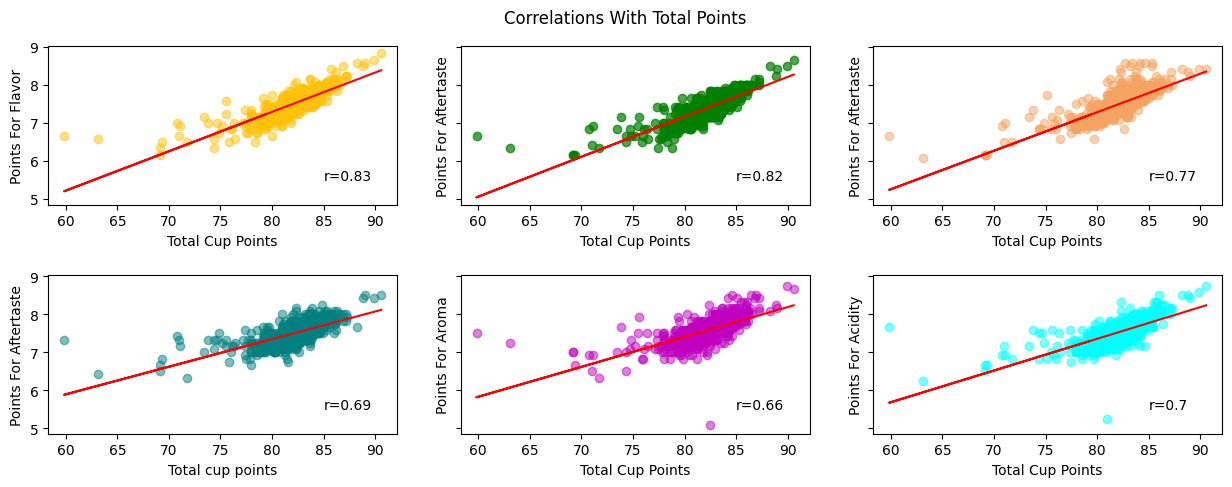

In [225]:
xposition = 85
yposition = 5.5
fig, axs = plt.subplots(2,3, tight_layout=True,  sharey=True, figsize=(13,5))
fig.tight_layout(pad=3)
axs[0][0].scatter(total_cup_points, data.flavor, alpha=0.5,c='#FFC20A')
axs[0][0].plot(x, y0, color='red', label='line of best fit')
axs[0][0].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.flavor),2)}")
axs[0][0].set_ylabel("Points For Flavor")
axs[0][0].set_xlabel("Total Cup Points")

axs[0][1].scatter(data.total_cup_points, data.aftertaste,alpha=0.7,c='g')
axs[0][1].plot(x, y1, color='red', label='line of best fit')
axs[0][1].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.aftertaste),2)}")
axs[0][1].set_ylabel("Points For Aftertaste")
axs[0][1].set_xlabel("Total Cup Points")

axs[0][2].scatter(data.total_cup_points, data.balance, alpha=0.5,c='sandybrown')
axs[0][2].plot(x, y2, color='red', label='line of best fit')
axs[0][2].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.balance),2)}")
axs[0][2].set_ylabel("Points For Aftertaste")
axs[0][2].set_xlabel("Total Cup Points")

axs[1][0].scatter(data.total_cup_points, data.body, alpha=0.5,c='teal')
axs[1][0].plot(x, y3, color='red', label='line of best fit')
axs[1][0].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.body),2)}")
axs[1][0].set_ylabel("Points For Aftertaste")
axs[1][0].set_xlabel("Total cup points")

axs[1][1].scatter(data.total_cup_points, data.aroma, alpha=0.5,c='m')
axs[1][1].plot(x, y4, color='red', label='line of best fit')
axs[1][1].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.aroma),2)}")
axs[1][1].set_ylabel("Points For Aroma")
axs[1][1].set_xlabel("Total Cup Points")

axs[1][2].scatter(data.total_cup_points, data.acidity, alpha=0.5,c='aqua')
axs[1][2].plot(x, y5, color='red', label='line of best fit')
axs[1][2].text(xposition, yposition, f"r={round(data.total_cup_points.corr(data.acidity),2)}")
axs[1][2].set_ylabel("Points For Acidity")
axs[1][2].set_xlabel("Total Cup Points")


fig.suptitle("Correlations With Total Points")
fig.savefig('correlations with total points2')

fig.show()

**Exploring color of coffee beans**

In [226]:
grouped_color = data.groupby("color")
table1 = grouped_color.mean(numeric_only=True)[['total_cup_points', 'altitude_mean_meters']].reset_index()
table1.columns = ['color', 'avg_total_cuppoints', 'avg_altitude']
table2 = grouped_color.sum().select_dtypes(['number']).number_of_bags.reset_index()
table3 = grouped_color.size().reset_index()
table3.columns = ['color', 'sample_size']
table23 = pd.merge(table2, table3)
new_table = pd.merge(table23, table1)
new_table

,color,number_of_bags,sample_size,avg_total_cuppoints,avg_altitude
0,Blue-Green,9482,65,83.011846,1263.238462
1,Bluish-Green,12422,79,82.807468,1359.334937
2,Green,120429,723,82.059115,2010.126214


In [227]:
new_table.to_csv('#_of_bags_by_bean_color_and_altitude.csv', index=False)

* green coffee beans are grown in significantly high altitudes compared to bluish-green or blue-green ones but they have the lowest total cuppings

* blue-green coffee beans have the highest avg total cup points

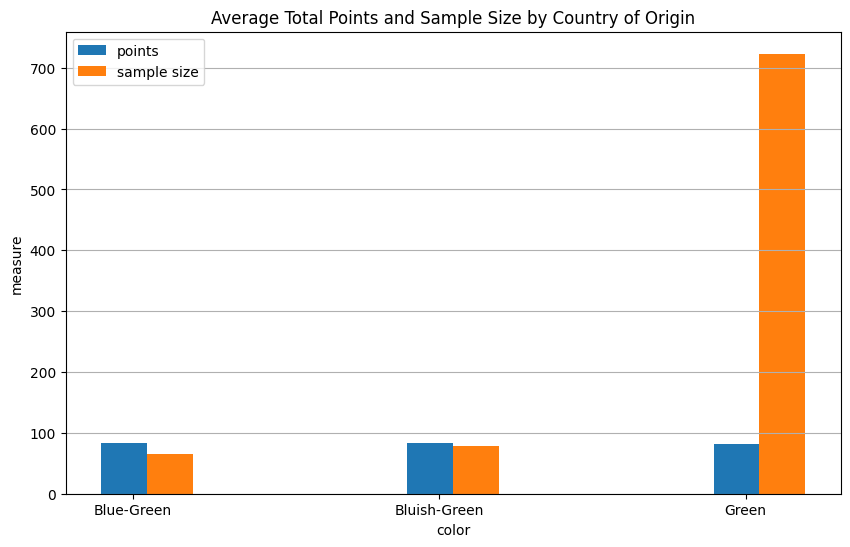

In [228]:

# Group by country and processing method, then calculate the mean total cup points
# grouped_data = data.groupby(['country_of_origin', 'processing_method'])['total_cup_points'].mean().unstack()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define the position of the bars
bar_width = 0.15
index = np.arange(len(new_table))

# Plot each processing method
bar1 = ax.bar(index, new_table['avg_total_cuppoints'], bar_width, label='points')
bar2 = ax.bar(index + bar_width, new_table['sample_size'], bar_width, label='sample size')
#bar2 = ax.bar(index + bar_width, new_table['number_of_bags'], bar_width, label='# of bags')

ax.set_xlabel('color')
ax.set_ylabel('measure')
ax.set_title('Average Total Points and Sample Size by Country of Origin')
ax.set_xticks(index + bar_width / 5)
ax.set_xticklabels( new_table.color)

ax.grid(axis='y')
ax.legend()

#grouped_data

**Exploring country productions**

In [229]:
grouped_species = data.groupby(by='species')
grouped_species.size()

species
Arabica    861
Robusta      6
dtype: int64

In [230]:
# showing countries and how many bags they tested and their avg total cup points
grouped_country = data.groupby(by='country_of_origin')
by_country_bags = grouped_country.sum().select_dtypes(['number'])['number_of_bags'].reset_index()
# by_country['mean_total_points'] = grouped_country.mean(numeric_only=True)['total_cup_points']

by_country_totalPoints= grouped_country.mean(numeric_only=True)['total_cup_points'].reset_index()
points_bags = pd.merge(by_country_bags,by_country_totalPoints )
points_bags.sort_values('number_of_bags', ascending=False)

,country_of_origin,number_of_bags,total_cup_points
8,Guatemala,29413,81.909658
2,Colombia,25864,83.363727
0,Brazil,21114,82.657634
16,Mexico,18263,81.006139
10,Honduras,12065,80.642340
3,Costa Rica,9151,82.819535
18,Nicaragua,3651,79.609231
7,Ethiopia,3590,86.398571
27,Uganda,3397,84.004348
25,Tanzania,3324,82.320000


In [231]:
#Choropleth showing global production of coffee
fig = px.choropleth(
    points_bags,
    locations='country_of_origin',
    locationmode='country names',  # This helps Plotly match the country names
    color='number_of_bags',
    hover_name='country_of_origin',
    color_continuous_scale=px.colors.sequential.Reds,
    title='Global Distribution of Coffee Production'
)
fig.write_html("coffee_production_map.html")
pio.write_image(fig, 'coffee_production_map.png')
# Show the map
fig.show()

In [232]:
# Top 5 global coffee producers

# extracting the names and number of bags produced for the top 5 global producers
top_5_bags = points_bags.sort_values(by='number_of_bags', ascending=False, ignore_index=True).iloc[0:5, :]
bags_labels = top_5_bags['country_of_origin'].to_list()
bags_sizes = top_5_bags['number_of_bags'].to_list()

# extracting the names and avg total points for the top 5 global producers
top_5_totalpoints = points_bags.sort_values(by='total_cup_points', ascending=False, ignore_index=True).iloc[0:5, :]
points_labels = top_5_totalpoints['country_of_origin'].to_list()
points_sizes = top_5_totalpoints['total_cup_points'].to_list()


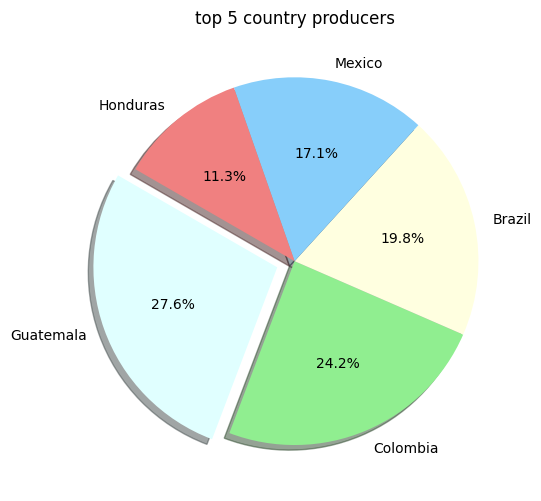

In [233]:
# Pie Chart for top 5 global coffee producers
colors = ['lightcyan', 'lightgreen','lightyellow', 'lightskyblue', 'lightcoral']
fig, ax = plt.subplots(tight_layout=True, figsize=(12,6))
fig.tight_layout(pad=4)

ax.pie(bags_sizes, explode=(0.1, 0, 0, 0, 0), labels=bags_labels, colors=colors,
startangle=150, autopct='%1.1f%%', shadow=True)
ax.set_title("top 5 country producers")

fig.savefig('top 5 countries in avg ratings & production.png')
fig.show()

**Looking to certification bodies**

In [234]:

grouped_partner = data[["certification_body",'total_cup_points']].groupby("certification_body")
mean_cup_points_per_body = grouped_partner.mean().reset_index()
max_cup_points_per_body = grouped_partner.max().reset_index()
max_cup_points_per_body.columns = ['certification_body','max_total_points']

min_cup_points_per_body = grouped_partner.min().reset_index()
min_cup_points_per_body.columns = ['certification_body','min_total_points']

#number of observations per certification body
body_count = grouped_partner.count().reset_index()
body_count = body_count.rename(columns={'total_cup_points':'counts'})


In [235]:
#calculating the percentage of sample per certification body with total points above 85
def percentage_above85(data):
  passed = (data['total_cup_points'] >= 85).sum()
  total = (data['total_cup_points']).count()
  result = (passed*100)/total
  return (round(result,2))


In [236]:
_80th_percentile = data.total_cup_points.quantile(.8)
print(f"The 80th percentile of total cup points = {_80th_percentile}")

The 80th percentile of total cup points = 83.83


In [237]:
# number of sample per certification body with total points above 83
def Passed(data):
  passed = (data['total_cup_points'] >= 83).sum()
  return (passed)

In [238]:
# creating new table for certification bodies to show % sample with total points above 85
above85 = grouped_partner.apply(percentage_above85).reset_index()
above85 = above85.rename(columns={0:'percent_observation_>_85'})
above85.sort_values('percent_observation_>_85', ascending=False, inplace=True)

In [239]:
# generating a table to the overall sample size per certification body
totals = grouped_partner.count().reset_index()
totals = totals.rename(columns={'total_cup_points':'sample_size'})
totals

,certification_body,sample_size
0,AMECAFE,139
1,Africa Fine Coffee Association,45
2,Almacafé,106
3,Asociacion Nacional Del Café,132
4,Asociación de Cafés Especiales de Nicaragua,5
5,Blossom Valley International,43
6,Brazil Specialty Coffee Association,47
7,Cafeterías De Especialidad AC,6
8,Centro Agroecológico del Café A.C.,6
9,Coffee Quality Institute,6


In [240]:
# creating new table for certification bodies to show number of sample with total points above 83 (80th percentile)
passed = grouped_partner.apply(Passed).reset_index()
passed = passed.rename(columns={0:'above_83'})
passed.sort_values('above_83', ascending=False, inplace=True)


In [241]:
# merging previous tables created for certification bodies

New = pd.merge(passed,totals)
New['pct_above_83'] = np.floor(New['above_83']*100/New['sample_size'])
New

,certification_body,above_83,sample_size,pct_above_83
0,Almacafé,76,106,71.0
1,Specialty Coffee Association,52,129,40.0
2,Asociacion Nacional Del Café,49,132,37.0
3,AMECAFE,21,139,15.0
4,Specialty Coffee Association of Costa Rica,19,39,48.0
5,NUCOFFEE,15,26,57.0
6,Uganda Coffee Development Authority,14,19,73.0
7,Kenya Coffee Traders Association,14,16,87.0
8,Brazil Specialty Coffee Association,14,47,29.0
9,Africa Fine Coffee Association,12,45,26.0


In [242]:
# creating a subtable for certification bodies with percentages above 50%
new = New[New.pct_above_83 > 50.0]
new

,certification_body,above_83,sample_size,pct_above_83
0,Almacafé,76,106,71.0
5,NUCOFFEE,15,26,57.0
6,Uganda Coffee Development Authority,14,19,73.0
7,Kenya Coffee Traders Association,14,16,87.0
10,METAD Agricultural Development plc,11,11,100.0
13,Yunnan Coffee Exchange,8,11,72.0


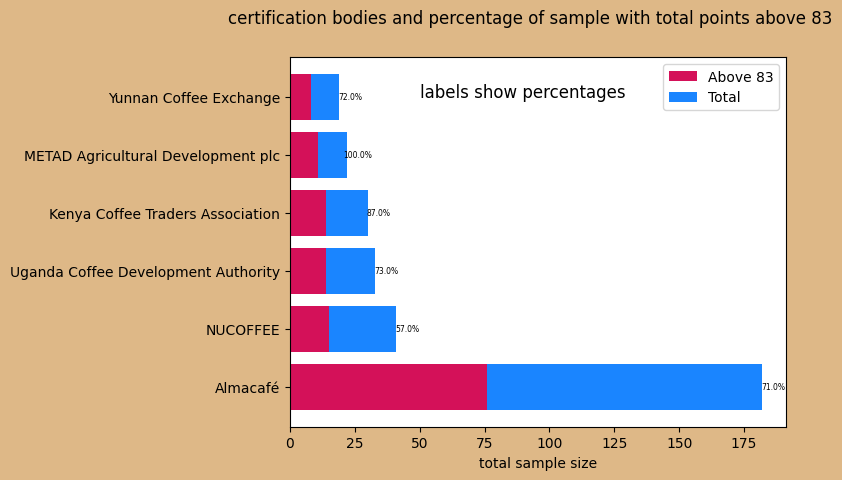

In [243]:
# certification bodies and percentage of sample with total points above 83
# plot showing only those with percentages above 50%

List = new['certification_body'].to_list()
x = new['certification_body']
fig, ax = plt.subplots(facecolor='burlywood')
List_tot = (new.sample_size + new.above_83).to_list()

ax.barh(x, new['above_83'], color='#D41159')
recs = ax.patches
for i in range(0,len(recs)):
    x_value = recs[i].get_width()
    y_value = recs[i].get_y() + recs[i].get_height() / 2
    space = 8

    #getting the sample size for each certification body
    f1 = new['certification_body']==List[i]
    f2 = new['above_83']== x_value

    label = (new[f1 & f2]['pct_above_83']).astype(str).map(lambda x : x+'%').to_list()[0]

    # Create annotation
    plt.annotate(
        label,
        (List_tot[i], y_value),
        xytext=(space, 0),
        textcoords='offset points',
        va='center',
        ha='center',
        color = 'black',
        fontsize = 5.5)

ax.barh(x, new['sample_size'], left=new['above_83'], color='#1A85FF')

# ax.grid(axis='x')
ax.set_xlabel('total sample size')
ax.text(50, 5, f"labels show percentages", fontsize=12)
fig.suptitle('certification bodies and percentage of sample with total points above 83')


ax.legend(["Above 83", "Total"])
fig.show()

In [244]:
# generating a list of all the certification bodies / country partners
country_partners = list(data.certification_body.value_counts().index)

In [245]:
#confidence interval for the avg total cup points

confidence_intervals = []
for partner in country_partners:
  # Separate the data by gender
  partner_name = partner.upper()
  partner_name = data[data["certification_body"] == partner]["total_cup_points"]


  # Calculate point estimate
  sample_mean = partner_name.mean()

  # Calculate margin of error
  alpha = 0.05 # significance level
  df = partner_name.count() - 1 # degrees of freedom
  t_crit = stats.t.ppf(1 - alpha /2 , df) # t-critical value
  se = partner_name.std() / np.sqrt(partner_name.count()) # standard error
  me = se * t_crit # margin of error

  # Calculate confidence interval
  lower_bound = sample_mean - me
  lower_bound = round(lower_bound, 3)
  upper_bound = sample_mean + me
  upper_bound = round(upper_bound, 3)

  confidence_intervals.append((lower_bound, upper_bound))



In [246]:
#creating new column for confidence intervals
mean_cup_points_per_body["confidence_intervals"] = confidence_intervals
mean_cup_points_per_body['percent_observation_>_85'] = above85['percent_observation_>_85'].to_list()

#new column for maximum total cup points in for each certification body
mean_cup_points_per_body['max_total_points'] = max_cup_points_per_body.max_total_points
mean_cup_points_per_body['min_total_points'] = min_cup_points_per_body.min_total_points
#renaming table
data_by_certification_body = mean_cup_points_per_body
#renaming some columns
data_by_certification_body = data_by_certification_body.rename(columns={'total_cup_points':'avg_total_points'})
#sorting by avg total points
data_by_certification_body = data_by_certification_body.sort_values(['percent_observation_>_85'], ascending = False, ignore_index=True)
data_by_certification_body = pd.merge(data_by_certification_body, body_count)
data_by_certification_body = data_by_certification_body.iloc[:,[0,3,6,1,2,4,5]]

data_by_certification_body

,certification_body,percent_observation_>_85,counts,avg_total_points,confidence_intervals,max_total_points,min_total_points
0,AMECAFE,81.82,139,80.936763,"(80.516, 81.358)",87.17,71.00
1,Africa Fine Coffee Association,37.50,45,82.348889,"(81.342, 82.321)",86.00,80.33
2,Almacafé,26.32,106,83.392453,"(81.87, 82.665)",85.92,79.50
3,Asociacion Nacional Del Café,19.23,132,81.831212,"(83.214, 83.571)",85.83,59.83
4,Asociación de Cafés Especiales de Nicaragua,18.18,5,80.316000,"(79.134, 81.482)",81.25,79.50
5,Blossom Valley International,16.67,43,81.853488,"(81.935, 82.636)",85.50,80.00
6,Brazil Specialty Coffee Association,10.08,47,82.285532,"(81.959, 82.739)",83.92,77.33
7,Cafeterías De Especialidad AC,5.13,6,82.680000,"(81.399, 82.308)",83.58,81.17
8,Centro Agroecológico del Café A.C.,4.65,6,82.460000,"(81.839, 83.396)",85.00,80.25
9,Coffee Quality Institute,3.77,6,80.805000,"(82.83, 84.152)",81.83,80.00


In [247]:
# creating subtable for certification bodies with non zero percent_observation_>_85
non_zero = data_by_certification_body[data_by_certification_body['percent_observation_>_85']>0.00]
non_zero

,certification_body,percent_observation_>_85,counts,avg_total_points,confidence_intervals,max_total_points,min_total_points
0,AMECAFE,81.82,139,80.936763,"(80.516, 81.358)",87.17,71.00
1,Africa Fine Coffee Association,37.50,45,82.348889,"(81.342, 82.321)",86.00,80.33
2,Almacafé,26.32,106,83.392453,"(81.87, 82.665)",85.92,79.50
3,Asociacion Nacional Del Café,19.23,132,81.831212,"(83.214, 83.571)",85.83,59.83
4,Asociación de Cafés Especiales de Nicaragua,18.18,5,80.316000,"(79.134, 81.482)",81.25,79.50
5,Blossom Valley International,16.67,43,81.853488,"(81.935, 82.636)",85.50,80.00
6,Brazil Specialty Coffee Association,10.08,47,82.285532,"(81.959, 82.739)",83.92,77.33
7,Cafeterías De Especialidad AC,5.13,6,82.680000,"(81.399, 82.308)",83.58,81.17
8,Centro Agroecológico del Café A.C.,4.65,6,82.460000,"(81.839, 83.396)",85.00,80.25
9,Coffee Quality Institute,3.77,6,80.805000,"(82.83, 84.152)",81.83,80.00


In [248]:
# adding the overall sample sizes for each certification body to the table
counts_data = data_by_certification_body[["certification_body","counts"]]
data = pd.merge(data,counts_data)

In [249]:
new.sort_values('pct_above_83',ascending=False).iloc[0:5]

,certification_body,above_83,sample_size,pct_above_83
10,METAD Agricultural Development plc,11,11,100.0
7,Kenya Coffee Traders Association,14,16,87.0
6,Uganda Coffee Development Authority,14,19,73.0
13,Yunnan Coffee Exchange,8,11,72.0
0,Almacafé,76,106,71.0


In [250]:
# top 5 certification bodies
top5_bodies = new.sort_values('pct_above_83',ascending=False).iloc[0:5]
top5_bodies


,certification_body,above_83,sample_size,pct_above_83
10,METAD Agricultural Development plc,11,11,100.0
7,Kenya Coffee Traders Association,14,16,87.0
6,Uganda Coffee Development Authority,14,19,73.0
13,Yunnan Coffee Exchange,8,11,72.0
0,Almacafé,76,106,71.0


In [251]:
#countries of origin for the top certification bodies
top5_list = top5_bodies.certification_body.to_list()
bodies_countries = {}
for name in top5_list:
  Value = data[data.certification_body == name].country_of_origin.value_counts().index.to_list()
  bodies_countries[name] = Value
bodies_countries

{'METAD Agricultural Development plc': ['Ethiopia'],
 'Kenya Coffee Traders Association': ['Kenya'],
 'Uganda Coffee Development Authority': ['Uganda'],
 'Yunnan Coffee Exchange': ['China'],
 'Almacafé': ['Colombia']}

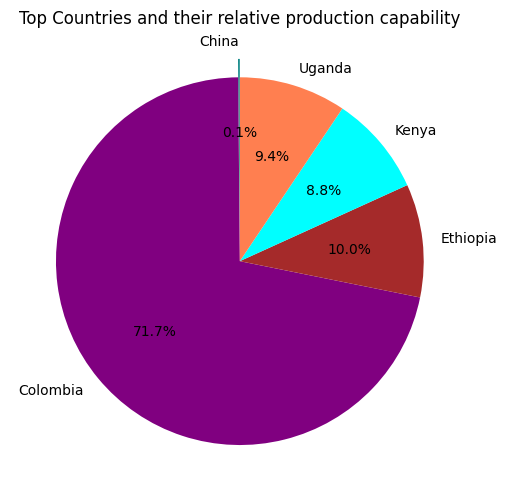

In [252]:
# relative production capabilities of the top 5 countries by coffee quality
Top_countries = ['Colombia', 'Ethiopia', 'Kenya', 'Uganda', 'China']

colorsp = ['teal', 'purple', 'brown','cyan', 'coral','limegreen']
sub = points_bags[points_bags['country_of_origin'].isin(Top_countries)]
countries = sub['country_of_origin']
bags = sub['number_of_bags']

fig, ax = plt.subplots(tight_layout=True, figsize=(12,6))
fig.tight_layout(pad=4)

ax.pie(bags, labels=countries, explode=(0.1, 0, 0, 0, 0), colors=colorsp,
startangle=90, autopct='%1.1f%%', shadow=False)
ax.set_title("Top Countries and their relative production capability")

fig.savefig('Top Countries.png')

# Show the plot
fig.show()

**Looking into processing methods**

In [253]:
# generating a list of all processing methods
processing_methods = data.processing_method.value_counts()
labels_methods = processing_methods.index.to_list()
sizes_methods = processing_methods.values
labels_methods

['Washed', 'Dried', 'Semi-washed', 'Other', 'Pulped natural']

In [254]:
# showing the sample size for each processing method
df = pd.DataFrame(sizes_methods, labels_methods)
df = df.reset_index()
df.columns = ['processing_method','sample_size']
df

,processing_method,sample_size
0,Washed,641
1,Dried,153
2,Semi-washed,46
3,Other,19
4,Pulped natural,8


In [255]:
# graph to show the various processing methods

fig = px.bar(df, x='processing_method', y='sample_size', color='processing_method')
fig.update_layout(title='Sample size per processing method', xaxis_title='processing methods', yaxis_title='number of bags')
fig.show()
pio.write_image(fig, 'processing_methods.png')

In [256]:
sub_data = data[['processing_method','certification_body','counts', 'total_cup_points','flavor', 'aftertaste']]

In [257]:
# determining the processing method used by the various certification bodies

#reshaping table
methods_used = sub_data.pivot_table(index=['certification_body'], columns=['processing_method'], values='counts')

#setting non missing values as 1 and missing values as 0
methods_used = (methods_used.notnull()).astype('int').reset_index()
methods_used

processing_method,certification_body,Dried,Other,Pulped natural,Semi-washed,Washed
0,AMECAFE,1,0,0,1,1
1,Africa Fine Coffee Association,1,0,0,1,1
2,Almacafé,1,0,0,0,1
3,Asociacion Nacional Del Café,1,1,0,0,1
4,Asociación de Cafés Especiales de Nicaragua,1,0,0,0,1
5,Blossom Valley International,1,1,0,1,1
6,Brazil Specialty Coffee Association,1,1,1,1,0
7,Cafeterías De Especialidad AC,1,0,0,0,1
8,Centro Agroecológico del Café A.C.,0,0,0,0,1
9,Coffee Quality Institute,1,0,0,0,1


In [258]:
#processing methods used by the top 5 certification bodies

top5_list = top5_bodies.certification_body.to_list()
methods_used[methods_used.certification_body.isin(top5_list)]

processing_method,certification_body,Dried,Other,Pulped natural,Semi-washed,Washed
2,Almacafé,1,0,0,0,1
11,Kenya Coffee Traders Association,1,0,0,0,1
12,METAD Agricultural Development plc,1,0,0,0,1
21,Uganda Coffee Development Authority,1,0,0,0,1
22,Yunnan Coffee Exchange,1,0,0,0,1


* all the top 5 certification bodies use natural | dry and/or Washed | Wet as their processing method.


In [259]:
# how processing method affects flavor, aftertaste, total points

#grouping by processing method
grouped_method = sub_data[["certification_body",'processing_method', "total_cup_points",	"flavor",	"aftertaste"]].groupby('processing_method')

In [260]:
#showing total points, flavor points and aftertaste points for the various processing methods
means_method = grouped_method.mean(numeric_only=True).sort_values('total_cup_points', ascending = False)
means_method.columns = ['avg_total_points','avg_flavor_points','avg_aftertaste_points']
means_method = means_method.reset_index()
max_method = grouped_method.max(numeric_only=True).sort_values('total_cup_points', ascending = False)
max_method.columns = ['max_total_points','max_flavor_points','max_aftertaste_points']
max_method = max_method.reset_index()
means_method
processing_results = pd.merge(means_method, max_method)
processing_results = processing_results.iloc[:,[0,1,4,2,5,3,6]]

processing_results

,processing_method,avg_total_points,max_total_points,avg_flavor_points,max_flavor_points,avg_aftertaste_points,max_aftertaste_points
0,Pulped natural,82.872500,86.58,7.510000,8.00,7.571250,8.00
1,Dried,82.845556,89.00,7.625033,8.58,7.473922,8.50
2,Semi-washed,82.622609,86.08,7.579348,8.17,7.456522,8.00
3,Washed,82.038066,90.58,7.493448,8.83,7.369719,8.67
4,Other,81.100526,84.67,7.446842,7.83,7.350526,7.83
